In [1]:
import dinkum
from dinkum.vfg import Gene, Receptor, Ligand
from dinkum.vfn import Tissue
from dinkum import vfg, vfn

from dinkum.display import MultiTissuePanel, tc_record_activity

import pandas as pd
from matplotlib import pyplot as plt


## Activation at multiple different levels

Let's build some input functions with different shapes:

initializing: dinkum v0.4.1
start=1 stop=10


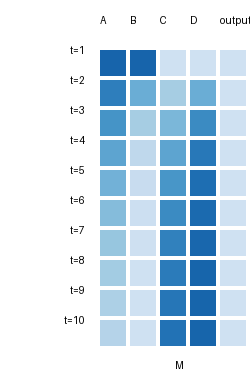

In [2]:
dinkum.reset()

m = Tissue(name='M')
a = Gene(name='A')
b = Gene(name='B')
c = Gene(name='C')
d = Gene(name='D')

output = Gene(name='output')

def decay_fn(*, A):
    decay = 1.2
    return A.level / decay, True

def decay_fn2(*, B):
    decay = 2
    return B.level / decay, True

def growth_fn(*, C):
    growth = 1/4
    return C.level + (100 - C.level) * growth, True

def growth_fn2(*, D):
    growth = 1/2
    return D.level + (100 - D.level) * growth, True
    
a.is_present(where=m, start=1, duration=1, level=100)
b.is_present(where=m, start=1, duration=1, level=100)
c.is_present(where=m, start=1, duration=1, level=0)
d.is_present(where=m, start=1, duration=1, level=0)

a.custom_activation(state_fn=decay_fn)
b.custom_activation(state_fn=decay_fn2)
c.custom_activation(state_fn=growth_fn)
d.custom_activation(state_fn=growth_fn2)

gene_names = vfg.get_gene_names()
display_fn, conc_df, active_df = dinkum.run_and_display_df(start=1, stop=10, gene_names=gene_names)
display_fn

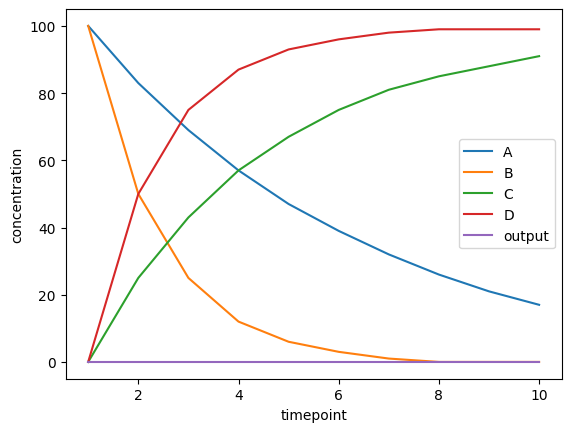

In [3]:
# now let's plot the concentrations
conc_df.plot()
plt.ylabel('concentration')
plt.legend()

## Connecting inputs to outputs



initializing: dinkum v0.4.1
start=1 stop=10


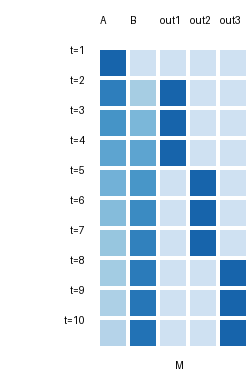

In [4]:
dinkum.reset()

m = Tissue(name='M')
a = Gene(name='A')
b = Gene(name='B')

output1 = Gene(name='out1')
output2 = Gene(name='out2')
output3 = Gene(name='out3')

def decay_fn(*, A):
    decay = 1.2
    return A.level / decay, True

def growth_fn(*, B):
    growth = 1/4
    return B.level + (100 - B.level) * growth, True

def left(*, A, B):
    if A.level >= 60:
        return 100, True
    else:
        return 0, False

def middle(*, A, B):
    if A.level < 80 and B.level > 50 and B.level < 80:
        return 100, True
    else:
        return 0, False

def right(*, A, B):
    if A.level < 80 and B.level > 80:
        return 100, True
    else:
        return 0, False

a.is_present(where=m, start=1, duration=1, level=100)
b.is_present(where=m, start=1, duration=1, level=0)

a.custom_activation(state_fn=decay_fn)
b.custom_activation(state_fn=growth_fn)

output1.custom_activation(state_fn=left)
output2.custom_activation(state_fn=middle)
output3.custom_activation(state_fn=right)

gene_names = vfg.get_gene_names()
display_fn, conc_df, active_df = dinkum.run_and_display_df(start=1, stop=10, gene_names=gene_names)
display_fn

In [5]:
conc_df

,tissue,timepoint_str,A,B,out1,out2,out3
timepoint,,,,,,,
1,M,t=1,100,0,0,0,0
2,M,t=2,83,25,100,0,0
3,M,t=3,69,43,100,0,0
4,M,t=4,57,57,100,0,0
5,M,t=5,47,67,0,100,0
6,M,t=6,39,75,0,100,0
7,M,t=7,32,81,0,100,0
8,M,t=8,26,85,0,0,100
9,M,t=9,21,88,0,0,100


In [6]:
active_df

,tissue,timepoint_str,A,B,out1,out2,out3
timepoint,,,,,,,
1,M,t=1,True,True,False,False,False
2,M,t=2,True,True,True,False,False
3,M,t=3,True,True,True,False,False
4,M,t=4,True,True,True,False,False
5,M,t=5,True,True,False,True,False
6,M,t=6,True,True,False,True,False
7,M,t=7,True,True,False,True,False
8,M,t=8,True,True,False,False,True
9,M,t=9,True,True,False,False,True


Text(0, 0.5, 'level')

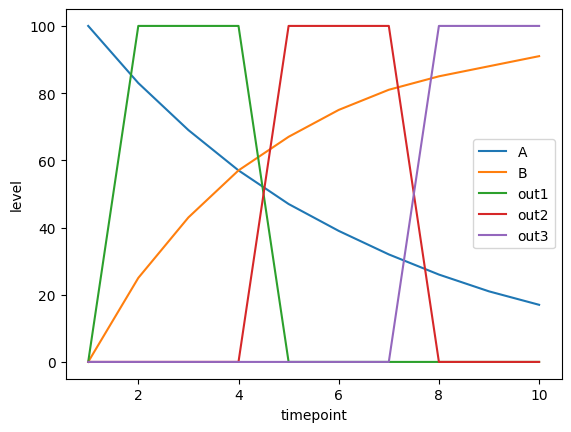

In [7]:
# now let's plot the concentrations
conc_df.plot()
plt.ylabel('level')
